In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime


start = '2002-04-01'
end = datetime.now().strftime('%Y-%m-%d')
df = yf.download('RELIANCE.NS', start=start, end=end)
#print(df.info())
df.head()
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-26,2251.000000,2258.0,2220.300049,2226.500000,2226.500000,7611267
2023-10-27,2240.000000,2273.5,2235.949951,2265.800049,2265.800049,5885542
2023-10-30,2274.000000,2325.0,2269.949951,2312.500000,2312.500000,8406652
2023-10-31,2328.000000,2328.0,2282.899902,2287.899902,2287.899902,6404219
2023-11-01,2289.149902,2317.5,2275.199951,2297.399902,2297.399902,5154595


In [12]:
df =df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-04-01,46.673141,47.702068,46.309536,46.750504,36.978374,16271826
1,2002-04-02,46.495205,47.075428,46.495205,46.967121,37.149712,9707066
2,2002-04-03,46.951649,46.951649,46.038765,46.255383,36.586742,6812526
3,2002-04-04,46.495205,49.496895,46.495205,47.245628,37.370003,63835106
4,2002-04-05,47.384880,48.119831,47.191475,47.299782,37.412834,21476234


In [13]:
df = df.drop(['Adj Close'], axis=1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2002-04-01,46.673141,47.702068,46.309536,46.750504,16271826
1,2002-04-02,46.495205,47.075428,46.495205,46.967121,9707066
2,2002-04-03,46.951649,46.951649,46.038765,46.255383,6812526
3,2002-04-04,46.495205,49.496895,46.495205,47.245628,63835106
4,2002-04-05,47.384880,48.119831,47.191475,47.299782,21476234


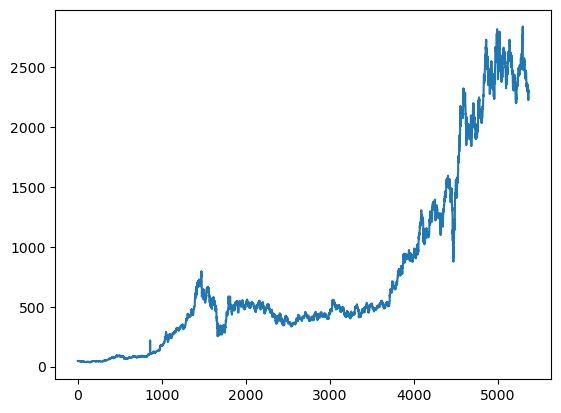

In [14]:
plt.plot(df.Close)

In [15]:
df

,Date,Open,High,Low,Close,Volume
0,2002-04-01,46.673141,47.702068,46.309536,46.750504,16271826
1,2002-04-02,46.495205,47.075428,46.495205,46.967121,9707066
2,2002-04-03,46.951649,46.951649,46.038765,46.255383,6812526
3,2002-04-04,46.495205,49.496895,46.495205,47.245628,63835106
4,2002-04-05,47.384880,48.119831,47.191475,47.299782,21476234
...,...,...,...,...,...,...
5361,2023-10-26,2251.000000,2258.000000,2220.300049,2226.500000,7611267
5362,2023-10-27,2240.000000,2273.500000,2235.949951,2265.800049,5885542
5363,2023-10-30,2274.000000,2325.000000,2269.949951,2312.500000,8406652
5364,2023-10-31,2328.000000,2328.000000,2282.899902,2287.899902,6404219


In [16]:
ma100=df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5361    2483.139998
5362    2481.245999
5363    2479.598499
5364    2477.683997
5365    2475.676497
Name: Close, Length: 5366, dtype: float64

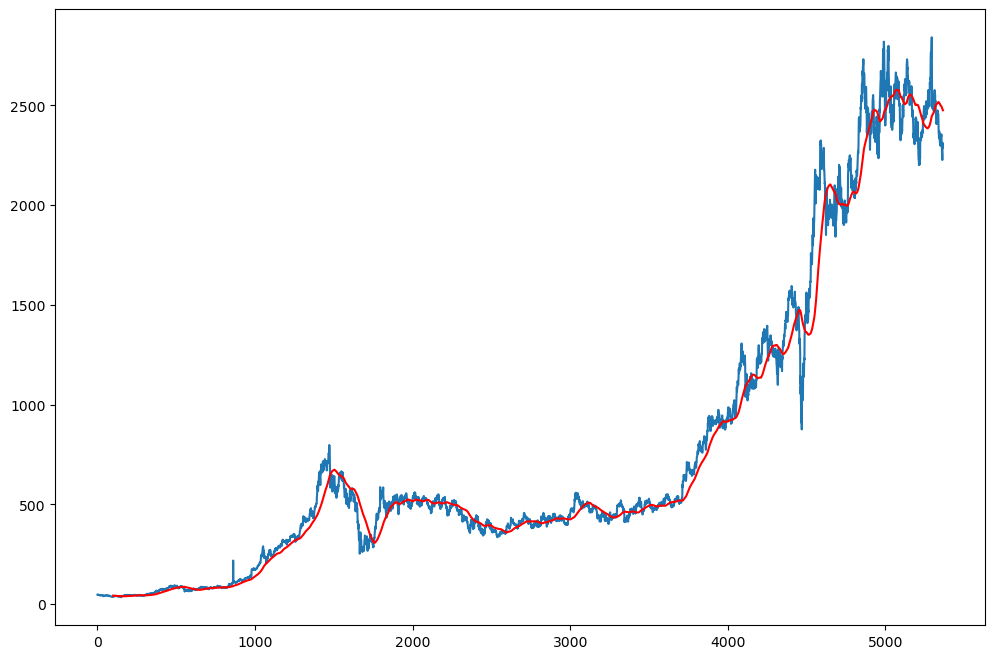

In [17]:
plt.figure(figsize=(12,8))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [18]:
ma200=df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5361    2435.944753
5362    2434.681003
5363    2433.673253
5364    2432.428253
5365    2430.931252
Name: Close, Length: 5366, dtype: float64

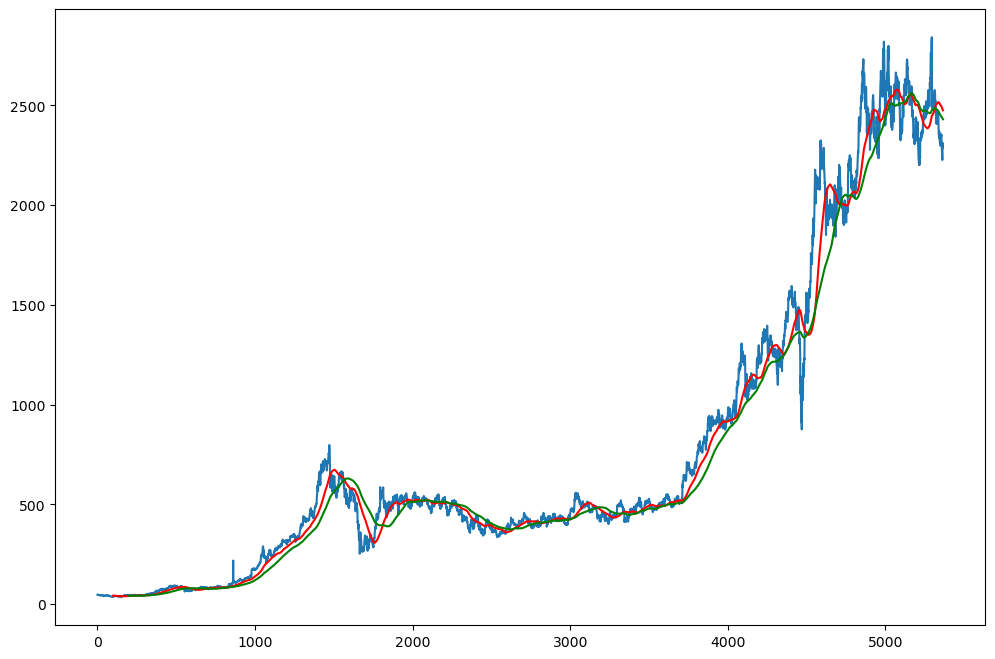

In [19]:
plt.figure(figsize=(12,8))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [20]:
df.shape

(5366, 6)

In [21]:
#Dividing training and testing data

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(3756, 1)
(1610, 1)


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.01668542],
       [0.01696908],
       [0.01603705],
       ...,
       [0.87418622],
       [0.86967837],
       [0.86040332]])

In [24]:
x_train = []
y_train = []

for i in range(100, len(data_training_array)):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train.shape

In [25]:
#ML Model

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [30]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
115/115 [==============================] - 39s 311ms/step - loss: 0.0271
Epoch 2/50
115/115 [==============================] - 36s 317ms/step - loss: 0.0065
Epoch 3/50
115/115 [==============================] - 34s 298ms/step - loss: 0.0057
Epoch 4/50
115/115 [==============================] - 34s 295ms/step - loss: 0.0051
Epoch 5/50
115/115 [==============================] - 34s 295ms/step - loss: 0.0047
Epoch 6/50
115/115 [==============================] - 34s 300ms/step - loss: 0.0047
Epoch 7/50
115/115 [==============================] - 35s 302ms/step - loss: 0.0043
Epoch 8/50
115/115 [==============================] - 34s 292ms/step - loss: 0.0038
Epoch 9/50
115/115 [==============================] - 36s 311ms/step - loss: 0.0036
Epoch 10/50
115/115 [==============================] - 34s 300ms/step - loss: 0.0037
Epoch 11/50
115/115 [==============================] - 34s 293ms/step - loss: 0.0034
Epoch 12/50
115/115 [==============================] - 32s 283ms/step - lo

In [32]:
model.save('keras_model.h5')

In [33]:
data_testing.head()

,Close
3756,678.840271
3757,678.617371
3758,672.599426
3759,657.888855
3760,654.496033


In [34]:
data_training.tail(100)

,Close
3656,492.258881
3657,497.880585
3658,494.884003
3659,505.235870
3660,509.644073
...,...
3751,702.045288
3752,709.673035
3753,701.574768
3754,698.132385


In [35]:
past_100_days = data_training.tail(100)

In [46]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [47]:
final_df.head()

,Close
0,492.258881
1,497.880585
2,494.884003
3,505.235870
4,509.644073


In [49]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.00239263],
       [0.00111727],
       ...,
       [0.77470545],
       [0.7642355 ],
       [0.76827876]])

In [50]:
input_data.shape

(1710, 1)

In [60]:
from keras.preprocessing.sequence import pad_sequences

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i, 0])
    y_test.append(input_data[i, 0])

In [61]:
x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = pad_sequences(x_test, maxlen=100, dtype='float32', padding='post', truncating='post')

print(x_test.shape)
print(y_test.shape)

(1610, 100)
(1610,)


In [62]:
# Making Predictions

In [63]:
y_predicted = model.predict(x_test)

51/51 [==============================] - 5s 92ms/step


In [64]:
y_predicted.shape

(1610, 1)

In [65]:
y_test

array([0.07941015, 0.07931528, 0.07675401, ..., 0.77470545, 0.7642355 ,
       0.76827876])

In [66]:
y_predicted

array([[0.14226957],
       [0.14310873],
       [0.14386189],
       ...,
       [0.7189323 ],
       [0.71681416],
       [0.71838796]], dtype=float32)

In [67]:
scaler.scale_

array([0.00042561])

In [68]:
scale_factor = 1/0.00042561
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

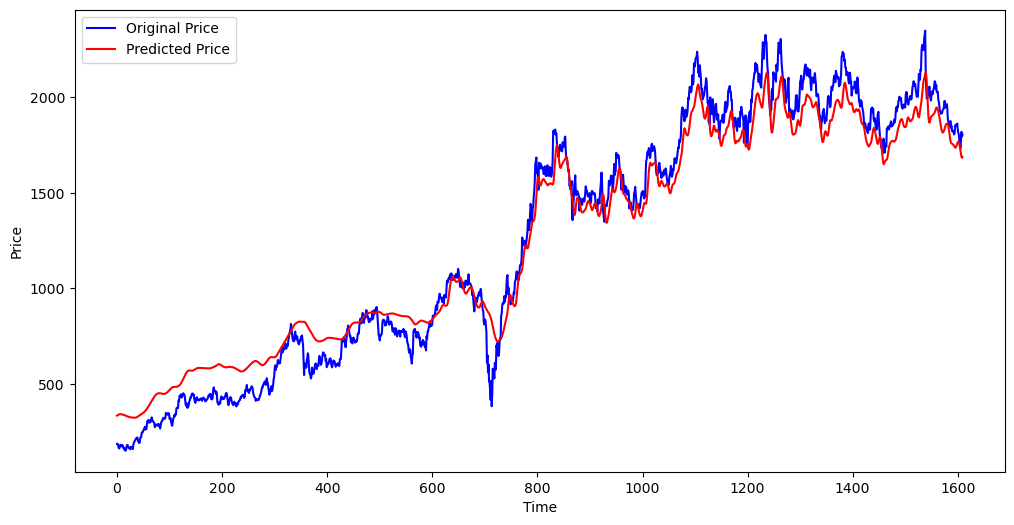

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price')

plt.legend()

plt.show()